In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "Geist", sans-serif;
    }
</style>

# **Neural networks from scratch**


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
np.set_printoptions(precision=2, suppress=True)

In [3]:
a0 = 10
a1 = -4
a2 = 0.7
a3 = 1

p = Polynomial([a0, a1, a2, a3])

display(p)

Polynomial([10. , -4. ,  0.7,  1. ], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [4]:
xx = np.linspace(-5, 5, 2000)
s = 12

yy = p(xx) + np.random.normal(0, s, size=xx.shape)

X_train, X_test, y_train, y_test = train_test_split(
    xx, yy, test_size=0.2, random_state=42
)

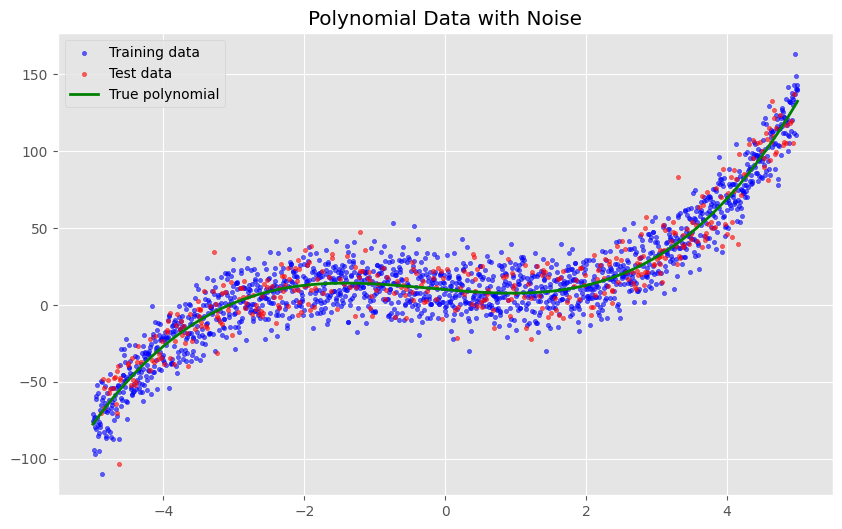

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.6, marker="."
)
plt.scatter(X_test, y_test, color="red", label="Test data", alpha=0.6, marker=".")
plt.plot(xx, p(xx), color="green", label="True polynomial", linewidth=2)
plt.title("Polynomial Data with Noise")
plt.legend()
plt.show()

## **Network Architecture**

We wll be working with the following neural network architecture:

- Input Layer: 1 neurons (a single feature)
- Hidden Layer: 2 neurons (with ReLU activation)
- Output Layer: 1 neuron (for regression output)

<div align="center">
<img src="../images/basic-structure.png" alt="Neural Network Architecture" width="400"/>
<img src="../images/basic-structure-with-activation.png" alt="Neural Network Architecture with Activation" width="460"/>
</div>

The input layer consists of our features:

$$
l_{ij}^{(1)} = x_{ij}^{(1)} \in \mathbb{R}^{n \times 1}, \quad i=1,\ldots,n \text{ (observations)}, \quad j=1 \text{ (features)}
$$

The second layer with 2 neurons computes the weighted sum:

$$
z_{ij}^{(2)} = z_{ik}^{(1)} w_{kj}^{(2)} + b_j^{(2)}, \quad k=1, \quad j=1,2
$$

$$
z_{ij}^{(2)} = z_{i1}^{(1)} w_{1j}^{(2)} + b_j^{(2)} \longrightarrow l_{ij}^{(2)} = \xi(l_{i1}^{(1)} w_{1j}^{(2)} + b_j^{(2)}) \in \mathbb{R}^{n \times 2}, \quad j=1,2
$$

The output layer with a single neuron (and no activation) computes:

$$
z_{ij}^{(3)} =  z_{ik}^{(2)} w_{kj}^{(3)} + b_{j}^{(3)}, \quad k=1,2
$$

$$
z_{ij}^{(3)} = z_{i1}^{(2)} w_{1j}^{(3)} + z_{i2}^{(2)} w_{2j}^{(3)} + b_{j}^{(3)} \in \mathbb{R}^{n \times 1}, \quad j=1
$$


l1 shape: (2000, 1)
l2 shape: (2000, 2)
l3 shape: (2000, 1)


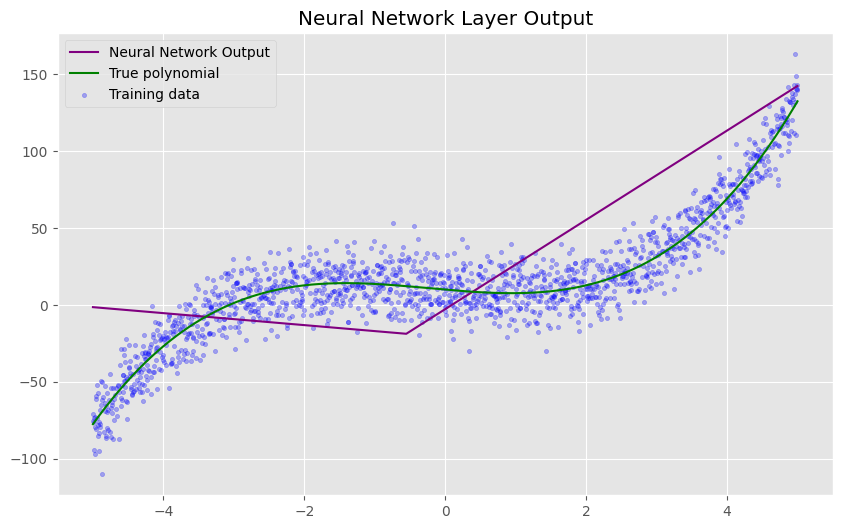

In [6]:
np.random.seed(0)


def relu(x):
    return np.maximum(0, x)


# frst layer
l1 = xx.reshape(-1, 1)

# second layer
w2 = 10 * np.random.normal(0, 1, size=(1, 2))
b2 = 10 * np.random.normal(0, 1, size=(2,))
l2 = relu(l1 @ w2 + b2)

# third layer
w3 = np.random.normal(0, 1, size=(2, 1))
b3 = np.random.normal(0, 1, size=(1,))
l3 = l2 @ w3 + b3  # this is the output of the network

print("l1 shape:", l1.shape)
print("l2 shape:", l2.shape)
print("l3 shape:", l3.shape)

plt.figure(figsize=(10, 6))
plt.plot(xx, l3, color="purple", label="Neural Network Output")
plt.plot(xx, p(xx), color="green", label="True polynomial")
plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.3, marker="."
)
plt.title("Neural Network Layer Output")
plt.legend()
plt.show()

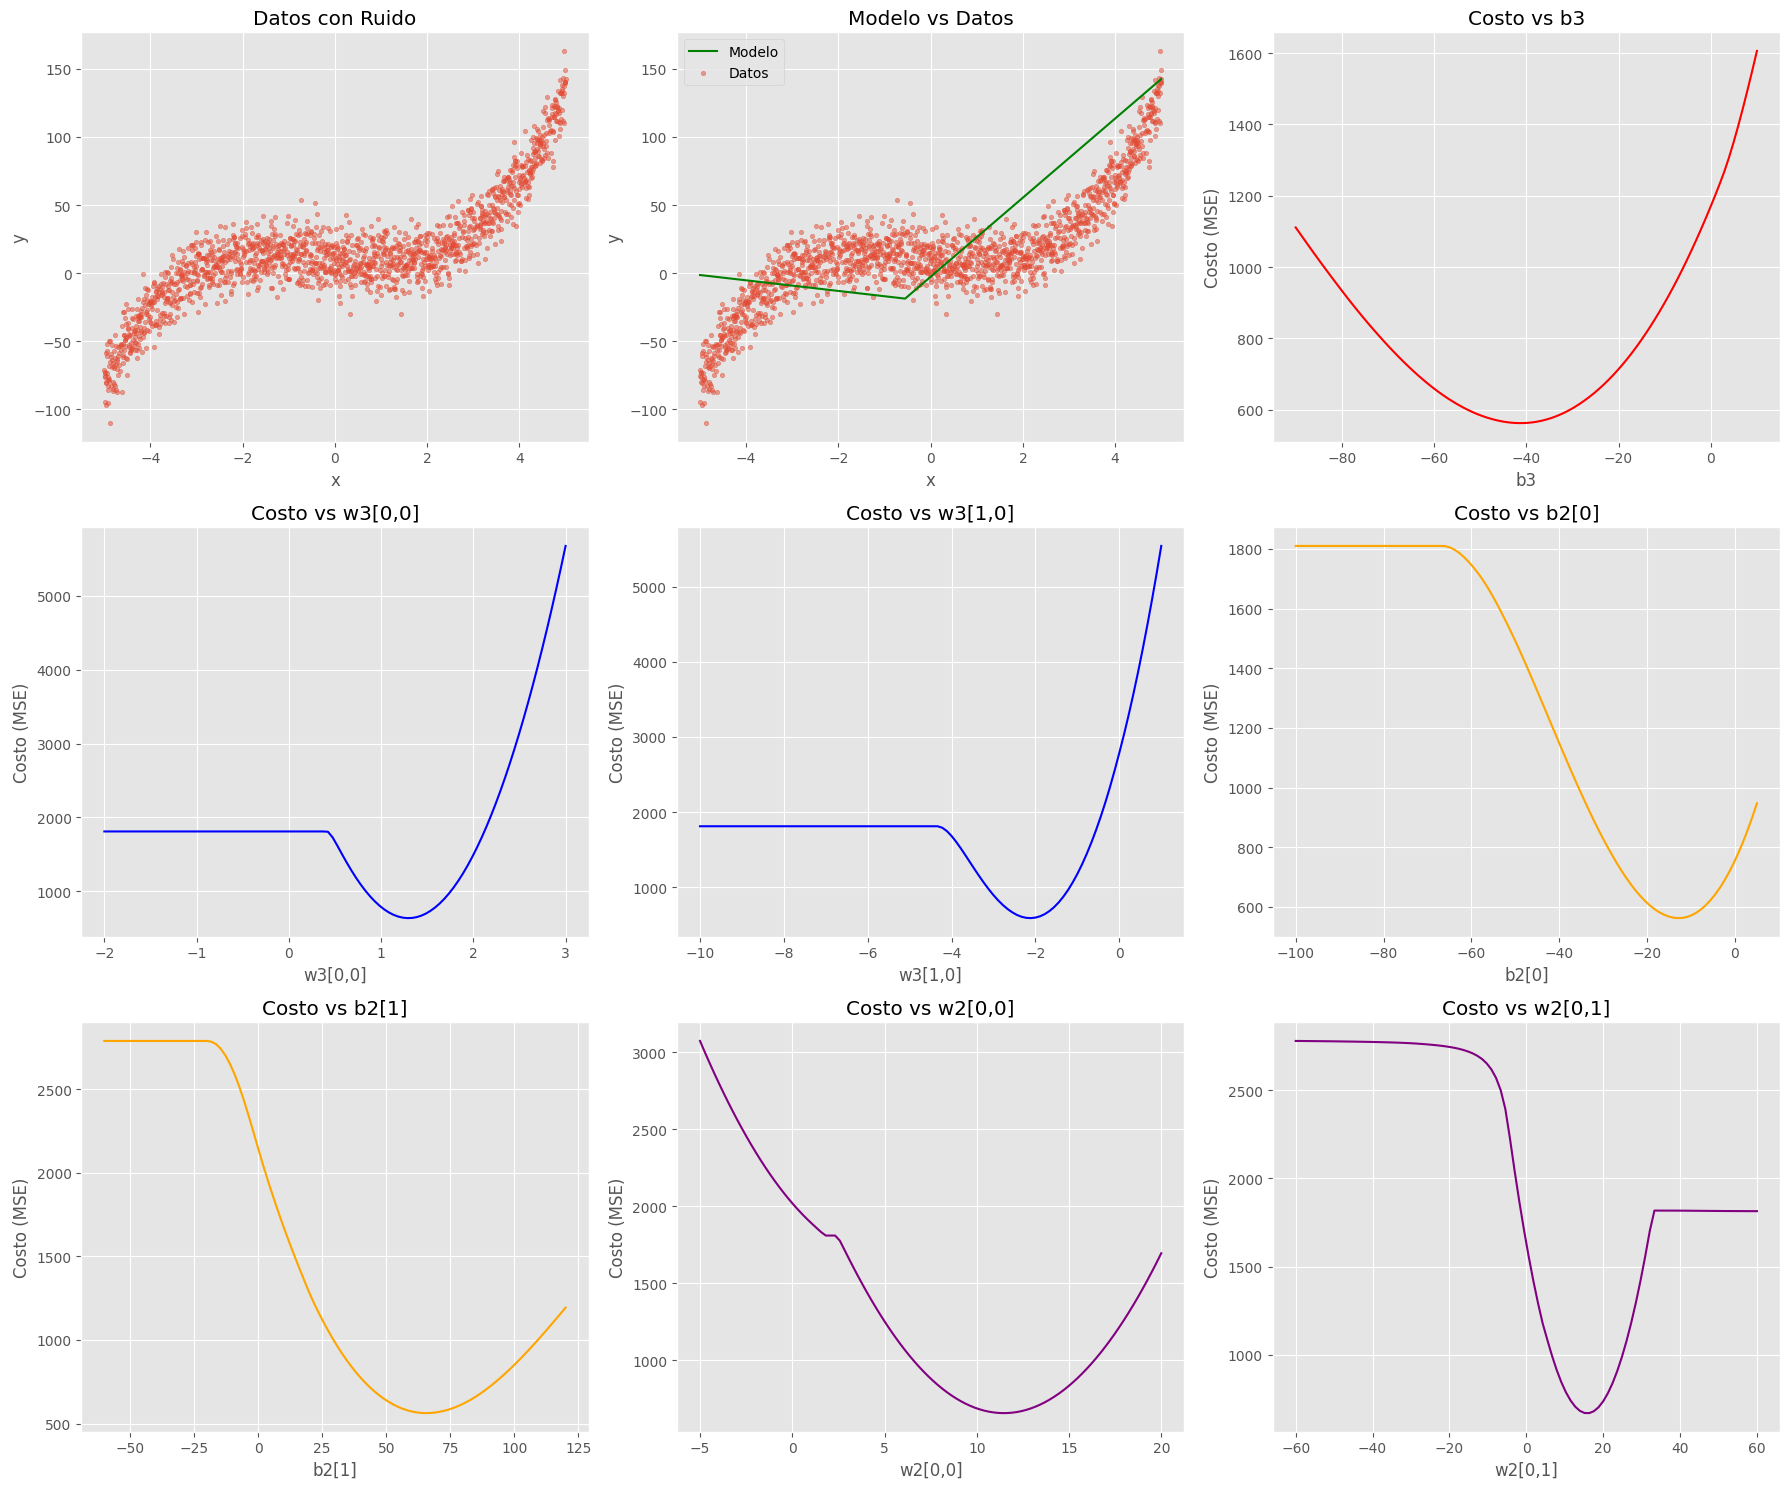

In [7]:
def cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Data
axes[0, 0].scatter(X_train, y_train, alpha=0.5, s=10, label="Datos")
axes[0, 0].set_title("Datos con Ruido")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")

# 2. Model vs Data
axes[0, 1].plot(xx, l3, color="green", label="Modelo")
axes[0, 1].scatter(X_train, y_train, alpha=0.5, s=10, label="Datos")
axes[0, 1].set_title("Modelo vs Datos")
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].legend()

l1_train = X_train.reshape(-1, 1)
# Precompute l2 for w3/b3 plots where w2/b2 are fixed
l2_train = relu(l1_train @ w2 + b2)

# 3. Cost vs b3
b3_vals = np.linspace(-90, 10, 100)
costs = []
for val in b3_vals:
    # b3 is shape (1,)
    pred = relu(l2_train @ w3 + val).flatten()
    costs.append(cost(y_train, pred))
axes[0, 2].plot(b3_vals, costs, color="red")
axes[0, 2].set_title("Costo vs b3")
axes[0, 2].set_xlabel("b3")
axes[0, 2].set_ylabel("Costo (MSE)")

# 4. Cost vs w3[0, 0]
w3_00_vals = np.linspace(-2, 3, 100)
costs = []
for val in w3_00_vals:
    w3_temp = w3.copy()
    w3_temp[0, 0] = val
    pred = relu(l2_train @ w3_temp + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 0].plot(w3_00_vals, costs, color="blue")
axes[1, 0].set_title("Costo vs w3[0,0]")
axes[1, 0].set_xlabel("w3[0,0]")
axes[1, 0].set_ylabel("Costo (MSE)")

# 5. Cost vs w3[1, 0]
w3_10_vals = np.linspace(-10, 1, 100)
costs = []
for val in w3_10_vals:
    w3_temp = w3.copy()
    w3_temp[1, 0] = val
    pred = relu(l2_train @ w3_temp + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 1].plot(w3_10_vals, costs, color="blue")
axes[1, 1].set_title("Costo vs w3[1,0]")
axes[1, 1].set_xlabel("w3[1,0]")
axes[1, 1].set_ylabel("Costo (MSE)")

# For w2 and b2, we need to recompute l2_train inside the loop

# 6. Cost vs b2[0]
b2_0_vals = np.linspace(-100, 5, 100)
costs = []
for val in b2_0_vals:
    b2_temp = b2.copy()
    b2_temp[0] = val
    l2_temp = relu(l1_train @ w2 + b2_temp)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 2].plot(b2_0_vals, costs, color="orange")
axes[1, 2].set_title("Costo vs b2[0]")
axes[1, 2].set_xlabel("b2[0]")
axes[1, 2].set_ylabel("Costo (MSE)")

# 7. Cost vs b2[1]
b2_1_vals = np.linspace(-60, 120, 100)
costs = []
for val in b2_1_vals:
    b2_temp = b2.copy()
    b2_temp[1] = val
    l2_temp = relu(l1_train @ w2 + b2_temp)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 0].plot(b2_1_vals, costs, color="orange")
axes[2, 0].set_title("Costo vs b2[1]")
axes[2, 0].set_xlabel("b2[1]")
axes[2, 0].set_ylabel("Costo (MSE)")

# 8. Cost vs w2[0, 0]
w2_00_vals = np.linspace(-5, 20, 100)
costs = []
for val in w2_00_vals:
    w2_temp = w2.copy()
    w2_temp[0, 0] = val
    l2_temp = relu(l1_train @ w2_temp + b2)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 1].plot(w2_00_vals, costs, color="purple")
axes[2, 1].set_title("Costo vs w2[0,0]")
axes[2, 1].set_xlabel("w2[0,0]")
axes[2, 1].set_ylabel("Costo (MSE)")

# 9. Cost vs w2[0, 1]
w2_01_vals = np.linspace(-60, 60, 100)
costs = []
for val in w2_01_vals:
    w2_temp = w2.copy()
    w2_temp[0, 1] = val
    l2_temp = relu(l1_train @ w2_temp + b2)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 2].plot(w2_01_vals, costs, color="purple")
axes[2, 2].set_title("Costo vs w2[0,1]")
axes[2, 2].set_xlabel("w2[0,1]")
axes[2, 2].set_ylabel("Costo (MSE)")

plt.tight_layout()
plt.show()

## **OOP Implementation**

To better understand how deep learning libraries like PyTorch work under the hood, we will define the following classes:

1.  **`Module`**: A base class for all layers.
2.  **`Linear`**: A layer that performs the linear transformation $z = xW + b$. It will store gradients for $W$ and $b$ during the backward pass.
3.  **`ReLU`**: An activation layer.
4.  **`MSELoss`**: A class to compute the loss and its gradient.
5.  **`SGD`**: An optimizer to update the parameters.

Each layer will have a `forward` method to compute the output and cache necessary values, and a `backward` method to compute gradients and propagate the error to the previous layer.

The forward pass defines how data flows through the network, while the backward pass computes gradients for learning. So for example, in the `Linear` layer, during the forward pass, we compute the linear transformation and cache the input. During the backward pass, we compute the gradients with respect to the weights, biases, and input, which will be used for parameter updates and further backpropagation.

### **_Forward Computation_**

The forward computation in the `Linear` layer can be expressed as:

$$
z_{ij}^{(L)} = l_{ik}^{(L-1)} w_{kj}^{(L)} + b_j^{(L)} \quad \text{(Linear layer - preactivation)}
$$

Notice that if we only consider linear transformations without activation functions, stacking multiple linear layers is equivalent to a single linear transformation. This is because the composition of linear functions results in another linear function. Therefore, to introduce non-linearity and enable the network to learn complex patterns, activation functions like ReLU are essential between linear layers.

### **_Activation Function_**

The reason we define the activation in a separate class and not directly in the `Linear` class is to maintain modularity and flexibility in our network architecture, allowing us to easily swap or modify activation functions without altering the linear layer's implementation.

The activation function (ReLU) can be expressed as:

$$
l_{ij}^{(L)} = \xi(z_{ij}^{(L)}) = \max(0, z_{ij}^{(L)}) \quad \text{(ReLU activation)}
$$

### **_Backward Computation_**

After applying activation functions in the forward pass and reaching the output layer, we compute the loss using the `MSELoss` class. This class calculates the mean squared error between the predicted outputs and the true targets, as well as the gradient of the loss with respect to the outputs.

The backward computation starts from the loss and propagates gradients back through the network. This process involves calculating the gradient of the loss with respect to the output, then using the chain rule to compute gradients for each layer's parameters and inputs. Each layer's `backward` method computes these gradients and passes them to the previous layer, allowing for efficient parameter updates during training.

So if for some linear layer $l_{ij}$ and loss function $\mathcal{L}$ we have that the layer's pre-activation is given by:

$$
z_{ij}^{(L)} = l_{ik}^{(L-1)} w_{kj}^{(L)} + b_j^{(L)}
$$

The backward computation can be expressed as:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w_{kj}^{(L)}} &= \frac{\partial \mathcal{L}}{\partial z_{ij}^{(L)}} \cdot \frac{\partial z_{ij}^{(L)}}{\partial w_{kj}^{(L)}} = \sum_{i} \frac{\partial \mathcal{L}}{\partial z_{ij}^{(L)}} \cdot l_{ik}^{(L-1)} \\
\frac{\partial \mathcal{L}}{\partial b_{j}^{(L)}} &= \frac{\partial \mathcal{L}}{\partial z_{ij}^{(L)}} \cdot \frac{\partial z_{ij}^{(L)}}{\partial b_{j}^{(L)}} = \sum_{i} \frac{\partial \mathcal{L}}{\partial z_{ij}^{(L)}} \cdot 1
\end{align*}
$$

After this, we compute the gradient with respect to the input of the layer (which is the output of the previous layer $L-1$) to propagate it backward:

$$
\frac{\partial \mathcal{L}}{\partial l_{ik}^{(L-1)}} = \frac{\partial \mathcal{L}}{\partial z_{ij}^{(L)}} \cdot \frac{\partial z_{ij}^{(L)}}{\partial l_{ik}^{(L-1)}} = \sum_{j} \frac{\partial \mathcal{L}}{\partial z_{ij}^{(L)}} \cdot w_{kj}^{(L)}
$$

These steps are precisely what the `backward` methods in each layer class implement, allowing for the systematic computation of gradients needed for training the neural network.

```python
def backward(self, grad):
    # grad corresponds to dL/dz^{(L)} (gradient from the next layer)

    # Compute gradients for parameters
    # dL/dw_{kj}^{(L)} = l_{ik}^{(L-1)} * dL/dz_{ij}^{(L)}
    self.dw = self.x.T @ grad

    # dL/db_{j}^{(L)} = sum_i(dL/dz_{ij}^{(L)})
    self.db = np.sum(grad, axis=0)

    # Compute gradient to propagate to previous layer
    # dL/dl_{ik}^{(L-1)} = dL/dz_{ij}^{(L)} * w_{kj}^{(L)}
    return grad @ self.w.T
```

#### _Optimization_

The optimizer step makes sure that after computing the gradients during the backward pass, we update the weights and biases of each layer using these gradients. The Stochastic Gradient Descent (SGD) optimizer updates the parameters by moving them in the direction that reduces the loss, scaled by the learning rate.

```python
def step(self):
    for layer in self.model:
        if isinstance(layer, Linear):
            layer.w -= self.lr * layer.dw
            layer.b -= self.lr * layer.db
```


In [8]:
class Module:
    def forward(self, x):
        raise NotImplementedError

    def backward(self, grad):
        raise NotImplementedError

    def __call__(self, x):
        return self.forward(x)


class Linear(Module):
    def __init__(self, input_dim, output_dim):
        # Initialize weights and biases
        np.random.seed(42)  # For reproducibility
        self.w = np.random.randn(input_dim, output_dim) * 0.1
        self.b = np.random.randn(output_dim) * 0.1

        # Initialize gradients
        self.dw = None
        self.db = None
        self.x = None  # To cache input for backward pass

    def forward(self, x):
        self.x = x
        return x @ self.w + self.b

    def backward(self, grad):
        # dL/dW = X.T @ dL/dY
        self.dw = self.x.T @ grad
        # dL/db = sum(dL/dY)
        self.db = np.sum(grad, axis=0)

        # Compute gradient for input to propagate back
        # dL/dX = dL/dY @ W.T
        return grad @ self.w.T


class ReLU(Module):
    def __init__(self):
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, grad):
        return grad * (self.x > 0)


class MSELoss:
    def __init__(self):
        self.y_pred = None
        self.y_true = None

    def forward(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean((y_true - y_pred) ** 2)

    def backward(self):
        # Gradient of MSE w.r.t prediction
        n = self.y_true.shape[0]
        return (2.0 / n) * (self.y_pred - self.y_true)


class SGD:
    def __init__(self, lr=0.001):
        self.lr = lr

    def step(self, modules):
        for m in modules:
            if isinstance(m, Linear):
                m.w -= self.lr * m.dw
                m.b -= self.lr * m.db

### **Training Loop**

The training loop involves iterating over the dataset multiple times (epochs), performing forward and backward passes, and updating the model parameters using the optimizer. It typically consists of the following steps:

1. **Forward Pass**: Pass the input data through the network to obtain predictions.

2. **Loss Computation**: Calculate the loss between the predictions and the true targets using the loss function.

3. **Backward Pass**: Compute the gradients of the loss with respect to the model parameters by calling the `backward` method on the loss and propagating through each layer.

4. **Parameter Update**: Use the optimizer to update the model parameters based on the computed gradients.


In [9]:
epochs = 5000
learning_rate = 0.001

# Prepare training data
X = X_train.reshape(-1, 1)
y = y_train.reshape(-1, 1)
m = X.shape[0]

# Define the model as a list of layers (Sequential)
model = [
    Linear(1, 2),
    ReLU(),
    Linear(2, 1),
]

loss_fn = MSELoss()
optimizer = SGD(lr=learning_rate)

loss_history = []

print("Starting training...")

for epoch in range(epochs):
    # 1. Forward Pass
    x_val = X
    for layer in model:
        x_val = layer(x_val)
    y_pred = x_val

    # 2. Compute Loss
    loss = loss_fn.forward(y, y_pred)
    loss_history.append(loss)

    # 3. Backward Pass
    grad = loss_fn.backward()
    for layer in reversed(model):
        grad = layer.backward(grad)

    # 4. Update Parameters
    optimizer.step(model)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print(f"Final Loss: {loss:.4f}")

Starting training...
Epoch 0: Loss = 1807.7206
Epoch 500: Loss = 287.0380
Epoch 1000: Loss = 193.6215
Epoch 1500: Loss = 174.7533
Epoch 2000: Loss = 169.7074
Epoch 2500: Loss = 168.2623
Epoch 3000: Loss = 167.7830
Epoch 3500: Loss = 167.5801
Epoch 4000: Loss = 167.4955
Epoch 4500: Loss = 167.4678
Final Loss: 167.4555


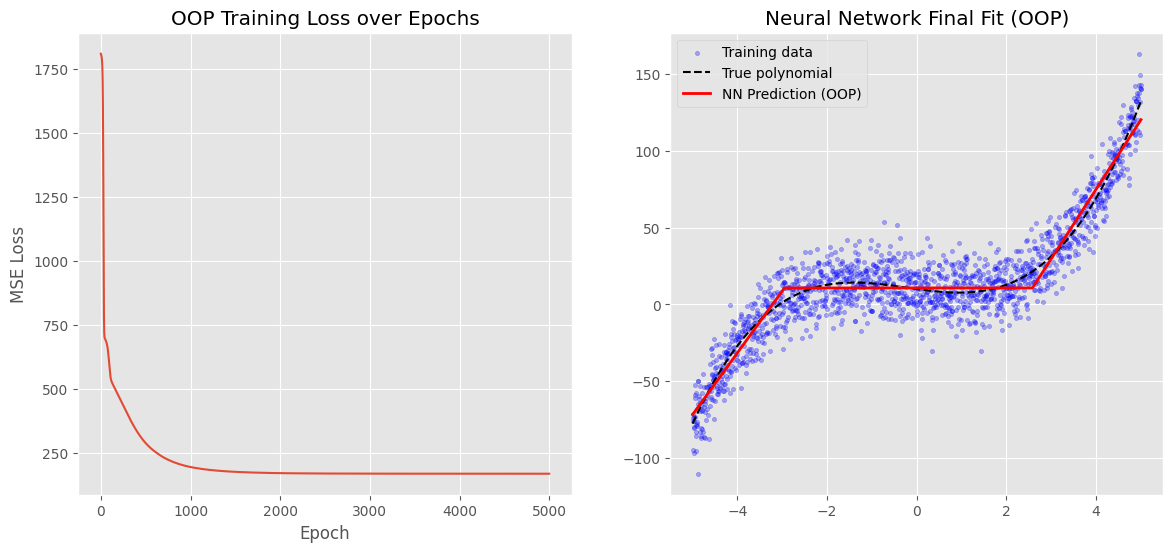

In [11]:
# Visualization of OOP Results
plt.figure(figsize=(14, 6))

# Plot Loss History
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("OOP Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

# Plot Final Fit
plt.subplot(1, 2, 2)
# Forward pass for visualization
x_plot = xx.reshape(-1, 1)
for layer in model:
    x_plot = layer(x_plot)
y_plot = x_plot

plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.3, marker="."
)
plt.plot(xx, p(xx), color="black", label="True polynomial", linestyle="--")
plt.plot(xx, y_plot, color="red", label="NN Prediction (OOP)", linewidth=2)
plt.title("Neural Network Final Fit (OOP)")
plt.legend()
plt.grid(True)

plt.show()